# LENDING CLUB CASE STUDY ANALYSIS

### DATA IMPORTING AND CLEANING STEPS

In [2]:
import pandas as pd,numpy as np

In [3]:
df = pd.read_csv("loan.csv") 

C:\anaconda\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#to elimiate the warnings for dtype
df = pd.read_csv("loan.csv", dtype='unicode') 

In [5]:
df.head(6)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


###### In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [6]:
#The columns are too many and most of them not relevant to our analysis
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#Droppping the columns which are enitrely filled with na

df=df.dropna(axis=1,how="all")

In [8]:
#Checking the % of missing values in all the variables
df_is_na=(df.isnull().sum()/len(df))*100
df_is_na.sort_values(ascending=False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
collection_recovery_fee        0.000000
acc_now_delinq                 0.000000
application_type               0.000000
url                            0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
issue_d                        0.000000
verification_status            0.000000
annual_inc                     0.000000
home_ownership                 0.000000
delinq_amnt                    0.000000


In [9]:
#Dropping the columns where there missing values are more than 50% in a column
df = df.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'], axis=1)

In [9]:
#Dropping the columns which do not contribute as Loan attribute or custumer attribute
#which do not add value to the analysis

In [10]:
#Dropping loan attributes which do not contribute to our analysis
#columns which are not necessary as they are dependent after loan is granted
#columns which are related after chargeoff hits
loan=df.drop(labels=['url','inq_last_6mths','last_pymnt_d','last_credit_pull_d',
                     'total_rec_prncp','total_rec_int','total_rec_late_fee','collections_12_mths_ex_med',
                     'policy_code','tax_liens',
                     'installment',
                     'total_rec_prncp','total_rec_int','total_rec_late_fee', 
                     'collection_recovery_fee', #post chargeoff values
                     'delinq_amnt',  #all values are zero
                     'chargeoff_within_12_mths',#all values are zero
                     'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med',
                     'out_prncp','out_prncp_inv'],axis=1) 

In [11]:
print(loan.application_type.value_counts())
print(" ")
print(loan.pymnt_plan.value_counts())
print("")
print(loan.initial_list_status.value_counts())
print(" ")
print(loan.acc_now_delinq.value_counts())
print(" ")
print(loan.pub_rec.value_counts())
print(" ")


INDIVIDUAL    39717
Name: application_type, dtype: int64
 
n    39717
Name: pymnt_plan, dtype: int64

f    39717
Name: initial_list_status, dtype: int64
 
0    39717
Name: acc_now_delinq, dtype: int64
 
0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64
 


In [12]:
#Dropping the above columns which have a single value
loan=loan.drop(labels=['application_type', 'pymnt_plan','initial_list_status','acc_now_delinq'], axis=1 )

In [13]:
#Dropping customer attributes which do not contribute to our analysis
loan=loan.drop(labels=['member_id','emp_title',
                     'zip_code'], axis=1) #already location columns is available in 'addr_state',


In [14]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [15]:
#Dropping the rows where loan is already granted
loan = loan[-(loan['loan_status']=='Current')]

In [16]:
df_is_na=(df.isnull().sum()/len(df))*100
df_is_na.sort_values(ascending=False)

emp_title                     6.191303
emp_length                    2.706650
pub_rec_bankruptcies          1.754916
last_pymnt_d                  0.178765
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
revol_util                    0.125891
tax_liens                     0.098195
title                         0.027696
last_credit_pull_d            0.005036
annual_inc                    0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
loan_status                   0.000000
issue_d                       0.000000
verification_status           0.000000
sub_grade                     0.000000
home_ownership                0.000000
addr_state                    0.000000
grade                         0.000000
installment                   0.000000
int_rate                      0.000000
term                          0.000000
funded_amnt_inv               0.000000
funded_amnt              

In [17]:
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.emp_length.fillna('0',inplace=True)


In [18]:
loan.pub_rec_bankruptcies.fillna('0',inplace=True)

In [19]:
loan.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [20]:
loan.home_ownership.replace(to_replace='NONE',value='OTHER', inplace=True)
loan.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: home_ownership, dtype: int64

In [21]:
loan.dtypes

id                      object
loan_amnt               object
funded_amnt             object
funded_amnt_inv         object
term                    object
int_rate                object
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc              object
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
addr_state              object
dti                     object
delinq_2yrs             object
earliest_cr_line        object
open_acc                object
pub_rec                 object
revol_bal               object
revol_util              object
total_acc               object
total_pymnt             object
total_pymnt_inv         object
recoveries              object
pub_rec_bankruptcies    object
dtype: object

In [22]:
#converting object values to int or float
loan.id=loan.id.astype(int)
loan.loan_amnt=loan.loan_amnt.astype(int)
loan.funded_amnt=loan.funded_amnt.astype(float)
loan.funded_amnt_inv=loan.funded_amnt_inv.astype(float)
loan.annual_inc=loan.annual_inc.astype(float)
loan.revol_bal=loan.revol_bal.astype(float)
loan.recoveries=loan.recoveries.astype(float)
loan.total_pymnt=loan.total_pymnt.astype(float)
loan.total_pymnt_inv=loan.total_pymnt_inv.astype(float)
loan.emp_length=loan.emp_length.astype(int)
loan.delinq_2yrs=loan.delinq_2yrs.astype(int)
loan.open_acc=loan.open_acc.astype(int)
loan.total_acc=loan.total_acc.astype(int)
loan.pub_rec_bankruptcies=loan.pub_rec_bankruptcies.astype(int)
loan.dti=loan.dti.astype(float)
loan.dtypes

id                        int32
loan_amnt                 int32
funded_amnt             float64
funded_amnt_inv         float64
term                     object
int_rate                 object
grade                    object
sub_grade                object
emp_length                int32
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
delinq_2yrs               int32
earliest_cr_line         object
open_acc                  int32
pub_rec                  object
revol_bal               float64
revol_util               object
total_acc                 int32
total_pymnt             float64
total_pymnt_inv         float64
recoveries              float64
pub_rec_bankruptcies      int32
dtype: object

In [23]:
print(loan.term.value_counts())
print(" ")
print(loan.grade.value_counts())
print(" ")
print(loan.verification_status.value_counts())
print(" ")
print(loan.delinq_2yrs.value_counts())
print(loan.delinq_2yrs.value_counts(bins=10))

 36 months    29096
 60 months     9481
Name: term, dtype: int64
 
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64
 
Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64
 
0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64
(-0.012, 1.1]    37593
(1.1, 2.2]         673
(2.2, 3.3]         212
(3.3, 4.4]          60
(4.4, 5.5]          21
(5.5, 6.6]          10
(6.6, 7.7]           4
(7.7, 8.8]           2
(9.9, 11.0]          1
(8.8, 9.9]           1
Name: delinq_2yrs, dtype: int64


In [24]:
#converting columns to strings which are having charecter data
loan['grade']=loan['grade'].apply(str)
loan.sub_grade=loan.sub_grade.astype(str)
loan.home_ownership=loan.home_ownership.astype(str)
loan.verification_status=loan.verification_status.astype(str)
loan.loan_status=loan.loan_status.astype(str)
loan.purpose=loan.purpose.astype(str)
loan.title=loan.title.astype(str)
loan.addr_state=loan.addr_state.astype(str)

In [25]:
loan.dtypes

id                        int32
loan_amnt                 int32
funded_amnt             float64
funded_amnt_inv         float64
term                     object
int_rate                 object
grade                    object
sub_grade                object
emp_length                int32
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
delinq_2yrs               int32
earliest_cr_line         object
open_acc                  int32
pub_rec                  object
revol_bal               float64
revol_util               object
total_acc                 int32
total_pymnt             float64
total_pymnt_inv         float64
recoveries              float64
pub_rec_bankruptcies      int32
dtype: object

In [26]:
#Stripping the % from the int_rate & revol_util
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['revol_util'] = loan['revol_util'].str.rstrip('%')
loan['int_rate'] = loan['int_rate'].astype(float)
loan['revol_util'] = loan['revol_util'].astype(float)


In [27]:
#derived columns
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

print(loan[['issue_d', 'year', 'month']].head(6))
loan.drop(labels='issue_d',axis=1)                            

     issue_d  year  month
0 2011-12-01  2011     12
1 2011-12-01  2011     12
2 2011-12-01  2011     12
3 2011-12-01  2011     12
5 2011-12-01  2011     12
6 2011-12-01  2011     12


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,recoveries,pub_rec_bankruptcies,year,month
0,1077501,5000,5000.0,4975.0,36 months,10.65,B,B2,10,RENT,...,0,13648.0,83.7,9,5863.155187,5833.84,0.00,0,2011,12
1,1077430,2500,2500.0,2500.0,60 months,15.27,C,C4,1,RENT,...,0,1687.0,9.4,4,1008.710000,1008.71,117.08,0,2011,12
2,1077175,2400,2400.0,2400.0,36 months,15.96,C,C5,10,RENT,...,0,2956.0,98.5,10,3005.666844,3005.67,0.00,0,2011,12
3,1076863,10000,10000.0,10000.0,36 months,13.49,C,C1,10,RENT,...,0,5598.0,21.0,37,12231.890000,12231.89,0.00,0,2011,12
5,1075269,5000,5000.0,5000.0,36 months,7.90,A,A4,3,RENT,...,0,7963.0,28.3,12,5632.210000,5632.21,0.00,0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500.0,1075.0,36 months,8.07,A,A4,4,MORTGAGE,...,0,7274.0,13.1,40,2822.969293,1213.88,0.00,0,2007,7
39713,90665,8500,8500.0,875.0,36 months,10.28,C,C1,3,RENT,...,0,8847.0,26.9,9,9913.491822,1020.51,0.00,0,2007,7
39714,90395,5000,5000.0,1325.0,36 months,8.07,A,A4,1,MORTGAGE,...,0,9698.0,19.4,20,5272.161128,1397.12,0.00,0,2007,7
39715,90376,5000,5000.0,650.0,36 months,7.43,A,A2,1,MORTGAGE,...,0,85607.0,0.7,26,5174.198551,672.66,0.00,0,2007,7


### Univariate Analysis

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [28]:
import matplotlib.pyplot as plt,seaborn as sns

<AxesSubplot:xlabel='count', ylabel='purpose'>

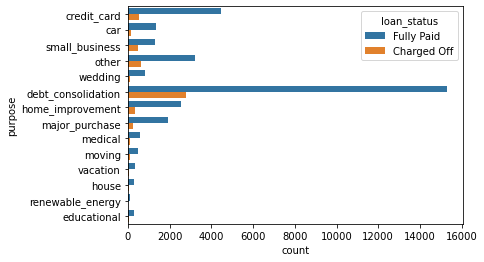

In [55]:
sns.countplot(y='purpose', hue='loan_status', orient='h', data=loan)
#sns.barplot(x="purpose",data=loan,y='loan_status')

###### Purpose vs Loan Amount

Text(0, 0.5, 'Loan amount in millions')

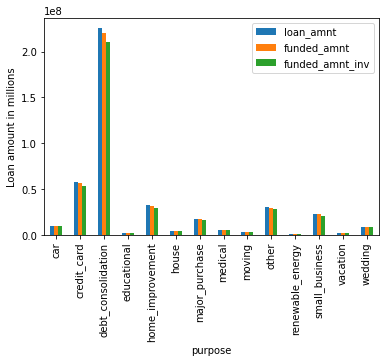

In [30]:
#sns.barplot(x='loan_amnt',y='purpose', data=loan)
#sns.catplot(x="loan_amnt", y="purpose", kind="bar", data=loan)

loan_purpose=loan.groupby('purpose').sum()
loan_purpose.plot(y=['loan_amnt','funded_amnt','funded_amnt_inv'], kind="bar")
plt.ylabel("Loan amount in millions")


###### Observations:
1. High loan amounts are taken for the purpose 'debt_consolidation'
2. The distribution of data is same across all the 3 amounts 'loan_amnt','funded_amnt','funded_amnt_inv'

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

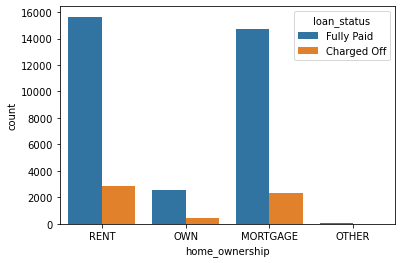

In [56]:
sns.countplot(x="home_ownership",data=loan,hue='loan_status')

  ### Observations
  Loans which from individuals without "OWN" home are likely to have charged - off than who own homes

<AxesSubplot:xlabel='year', ylabel='count'>

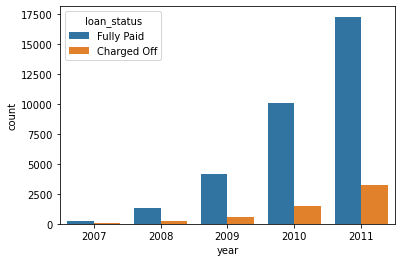

In [58]:
sns.countplot(x="year",data=loan,hue='loan_status')

In [34]:
##Removing OUTLIERS ANNUAL INCOME with more than 1Million

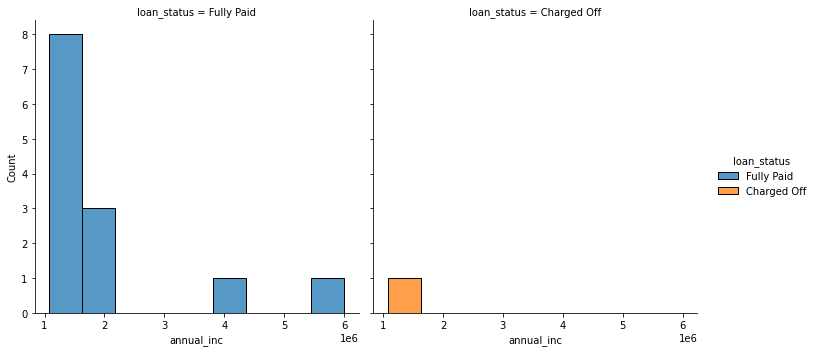

In [60]:
#loan_inc.describe()
loan_inc=loan[['annual_inc', 'loan_status']]
loan_inc=loan_inc[loan_inc["annual_inc"]>1000000]
#sns.boxplot(x='annual_inc',y='loan_status', data=loan_inc)
sns.displot(loan_inc, x='annual_inc', hue='loan_status', col='loan_status')

## From the above we understand                                                                                                                                                                                            
1. High annual Income persons are less likely to  Charged-off                                                                                                                                                       
2. Charged Off loans are spread across annual income is between 1 to 2 Millions only. Removing these outliers, as the very less data is spread amoung them

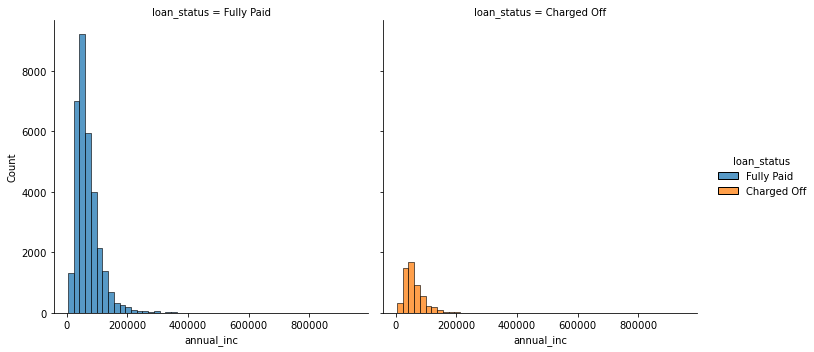

In [61]:
loan=loan[loan['annual_inc']<1000000]
loan_inc=loan[['annual_inc', 'loan_status']]
#loan_inc=loan_inc[loan_inc["annual_inc"]<1000000]
#sns.boxplot(x='annual_inc',y='loan_status', data=loan_inc)
sns.displot(loan_inc, x='annual_inc', hue='loan_status', col='loan_status', bins=50)

###### The data is spread for incomes less than 200000

<AxesSubplot:xlabel='annual_inc', ylabel='loan_status'>

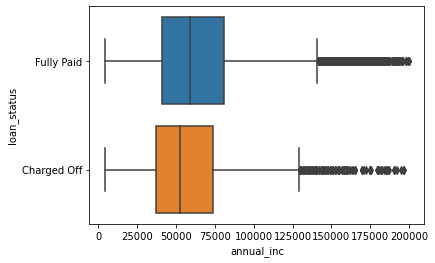

In [62]:
loan=loan[loan['annual_inc']<200000]
sns.boxplot(x='annual_inc',y='loan_status', data=loan)

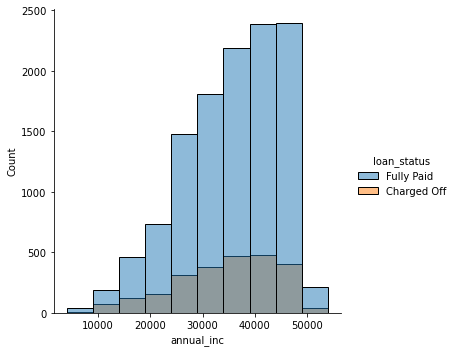

In [63]:
sns.displot(loan[loan['annual_inc']<50000], x='annual_inc', hue='loan_status', binwidth=5000)

  ### Observations
  As more loans are received more charged off loans will occur. 
  In future, more loans will be expected and more charged off loans are could occur

term        loan_status
 36 months  Charged Off     3186
            Fully Paid     25418
 60 months  Charged Off     2370
            Fully Paid      6914
dtype: int64


<AxesSubplot:xlabel='term', ylabel='count'>

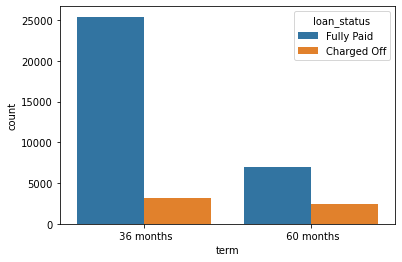

In [64]:
print(loan.groupby(['term','loan_status']).size())
sns.countplot(x = 'term', hue='loan_status', data=loan)

  ### Observations
  Number of charged-off loans per total loans for 3year term loan is lower compared to Number of charged-off loans per  total loans for 5year term loan
  Hence, 5 years term loan (or 60 months term) should be reduced

<AxesSubplot:xlabel='emp_length', ylabel='count'>

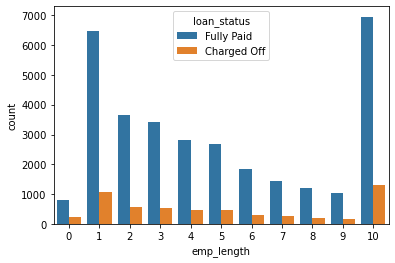

In [65]:
a=loan.groupby(['emp_length','loan_status']).size()
b=loan.groupby('emp_length').size()
sns.countplot(x = 'emp_length', hue='loan_status', data=loan)
#print(list(b))

###### Observations
1. The 0 experience people have high charged_off compared to experience people and charged_off % = 22%
2. The 9+ years are less likely to default with charged_off % = 12%
3. More loans are taken by 10 or 10+ years experince and charged off percent = 15%

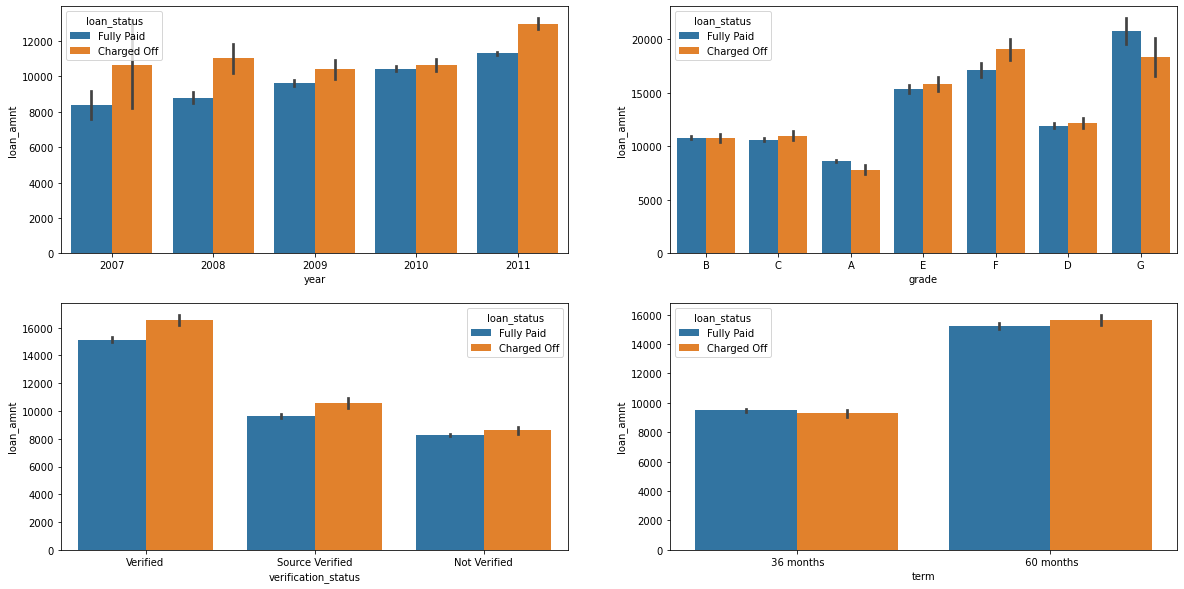

<Figure size 432x288 with 0 Axes>

In [74]:
plt.subplots(2, 2, figsize=(20, 10))
plt.subplot(2,2,1)
sns.barplot(x='year', y='loan_amnt',hue='loan_status', data=loan)
plt.subplot(2,2,2)
sns.barplot(x='grade',y='loan_amnt',hue='loan_status', data=loan)
plt.subplot(2,2,3)
sns.barplot(x='verification_status',y='loan_amnt',hue='loan_status', data=loan)
plt.subplot(2,2,4)
sns.barplot(x='term',y='loan_amnt', hue='loan_status',data=loan)

plt.figure().subplots_adjust(hspace=0.8, wspace=0.8)


###### Observations 
Visualizations from YEAR
1. The loan_amount lended increases each year, indicating Lending Club's growth year to year.
2. More charged_off loans are present in 3rd quarter,more loans are taken at the end of the year

Visualizations from GRADE

3. High % of Fully_paid loans belongs to Grade 'G'
4. High % of Charged-off loans belongs to Grade 'F'

Visualizations from VERFICATION 

5. Charged-off loans are relatively same across all types of verifications

Visualizations from TERM 

6. Term has no impact on charged-off loan. However, more loan amount is at stake for 60 month term

<AxesSubplot:xlabel='month'>

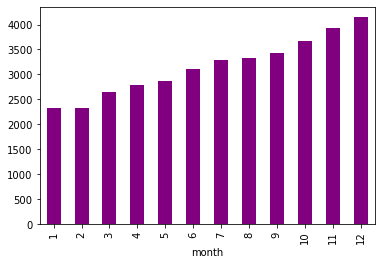

In [135]:
loan.groupby(['month']).size().plot.bar(color='purple')

<AxesSubplot:xlabel='addr_state'>

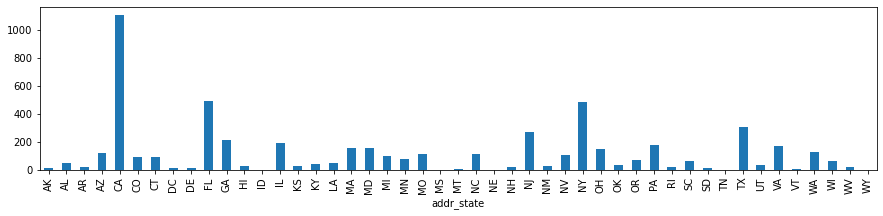

In [115]:
#a=loan.groupby(['addr_state','loan_status']).size()
plt.figure(figsize=(15, 3))
loan_col1=loan[loan['loan_status']=="Charged Off"]

loan_col1.groupby(['addr_state']).size().plot.bar()
#a/b
##sns.countplot(x = 'addr_state', hue='loan_status', data=loan)

<AxesSubplot:xlabel='addr_state'>

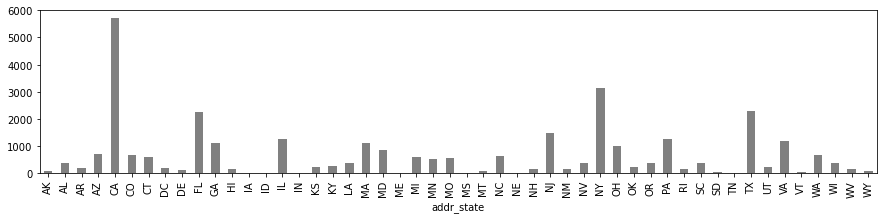

In [127]:
plt.figure(figsize=(15, 3))
loan_col2=loan[loan['loan_status']=="Fully Paid"]
loan_col2.groupby(['addr_state']).size().plot.bar(color='grey')

Charged off is higher in CA,GA,NY

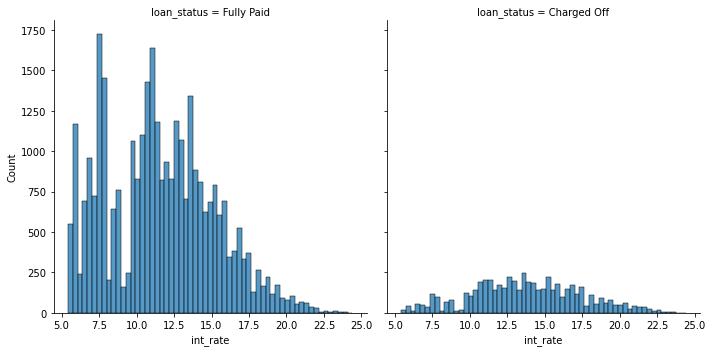

In [131]:
#loan_col2.groupby(['int_rate']).size().plot.bar(color='grey')
sns.displot(x='int_rate', col='loan_status', data=loan)

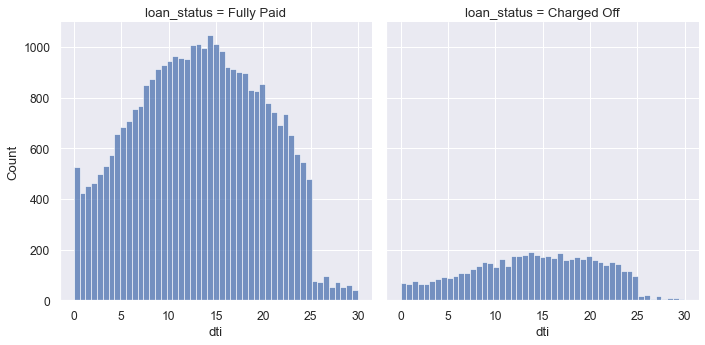

In [165]:
sns.displot(x='dti', col='loan_status', data=loan)

###### Observations
Loans at higher Interest rates (>20%) are relatively low, which is good. 
Most of the charged-offs are spread around 10-17.5% 


##   Bivariate Analysis

###### DATA CONVERSION TO CATEGORICAL

In [41]:
loan[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,37888.000000,37888.000000,37888.000000
mean,10902.729756,10646.642077,10092.876864
std,7223.887442,6969.896813,6899.973095
min,500.000000,500.000000,0.000000
25%,5125.000000,5000.000000,5000.000000
50%,9600.000000,9250.000000,8500.000000
75%,15000.000000,14825.000000,13975.000000
max,35000.000000,35000.000000,35000.000000


In [132]:
#loan_df=loan['emp_length'].apply(lambda x: "1-3" if (x >= 1 & x <= 3) 
#                                 else("3-6" if(x > 3 & x <= 6 )  
#                                      else("7-9" if (x > 6 & x <=9 ) else   "10+")))
loan['exp']=loan['emp_length'].apply(lambda x: "(0-1)" if (x <=1) else ("(2-5)" if (2<=x<=5) 
                                                                  else ("(6-9)" if (6<=x<=9)
                                                                       else "(10+)"))
                                )
print(loan.exp.value_counts())

(2-5)    14605
(0-1)     8596
(10+)     8258
(6-9)     6429
Name: exp, dtype: int64


In [133]:
loan['income']=loan['annual_inc'].apply(lambda x: "0-20k" if (x <=20000) else ("20-40k" if (20000<=x<=40000) 
                                                                  else ("40-60k" if (40000<=x<=60000)
                                                                        else("40-60k" if (60000<=x<=80000)
                                                                             else("80-1M" if (80000<=x<=100000)
                                                                                  else "1M+"))))
                                       )
                                            
print(loan.income.value_counts())

40-60k    18884
20-40k     8518
1M+        4792
80-1M      4514
0-20k      1180
Name: income, dtype: int64


<AxesSubplot:ylabel='id'>

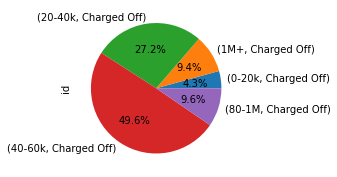

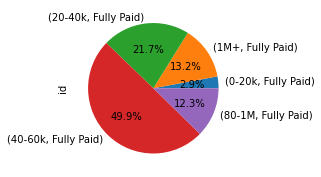

In [136]:
Inc_Grp=loan[['income','loan_status','id']]
Inc_Grp.head(10)
Inc_Grp1=Inc_Grp[Inc_Grp['loan_status']=='Charged Off']
Inc_Grp2=Inc_Grp[Inc_Grp['loan_status']=='Fully Paid']
Inc_Grp1.groupby(['income','loan_status']).count().plot(kind='pie', figsize=(4, 3), y='id',autopct='%1.1f%%', legend=False)
Inc_Grp2.groupby(['income','loan_status']).count().plot(kind='pie', figsize=(4, 3), y='id',autopct='%1.1f%%', legend=False)


###### Observations
1. 0-20k has more charged off than Fully Paid
2. 80-1M has more charged off than Fully paid

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

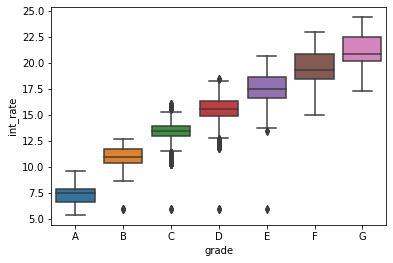

In [140]:
sns.boxplot(x = 'grade', y='int_rate', data=loan,order = 'ABCDEFG')

<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

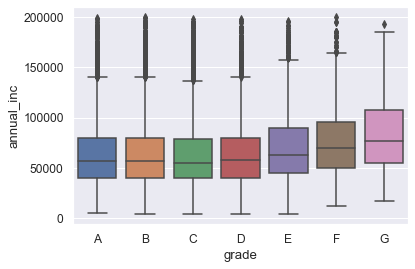

In [207]:
sns.boxplot(x = 'grade', y='annual_inc', data=loan,order = 'ABCDEFG')

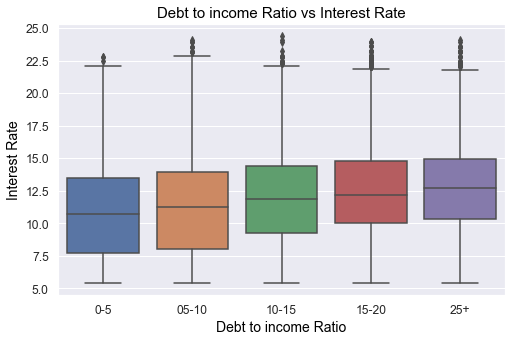

In [217]:
# Bivariate Analysis - dti vs Interest Rate
loan_dti=loan
loan_dti['dti_slabs'] = pd.cut(loan_dti['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

plt.figure(figsize=(8,5))
sns.boxplot(y='int_rate', x='dti_slabs',data=loan)
plt.title('Debt to income Ratio vs Interest Rate',fontsize=15,color='black')
plt.ylabel('Interest Rate',fontsize=14,color = 'black')
plt.xlabel('Debt to income Ratio',fontsize=14,color = 'black')
plt.show()

In [218]:
#Higher DTI has more spread in higher interest rates.

###### Observations  

As the grade increases , Interest Rate also increases

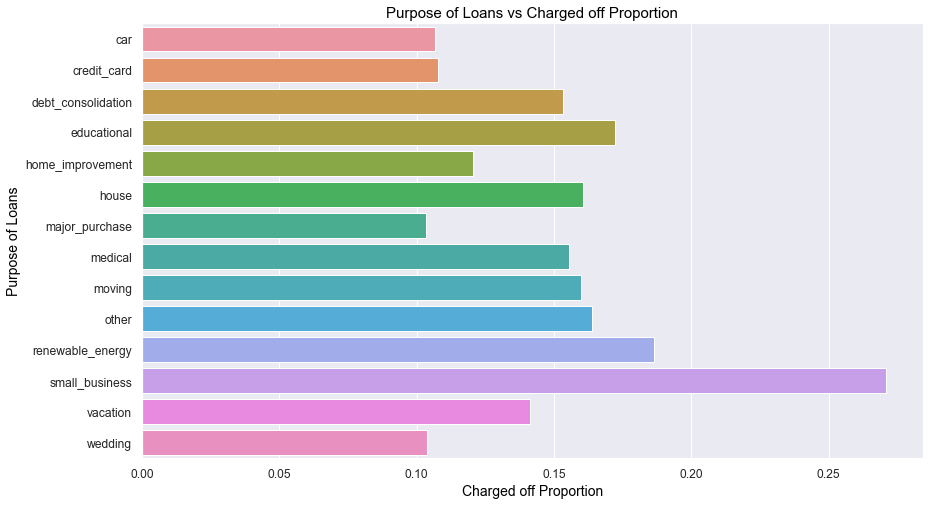

In [58]:
purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='white')
ax1.set_title('Purpose of Loans vs Charged off Proportion',fontsize=15,color = 'black')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='black')
ax1.set_xlabel('Charged off Proportion',fontsize=14,color = 'black')
plt.show()

1) Small Business applicants have high chances of getting charged off. 

2) Where renewable_energy's chanrged off proportion was also more as compare to other categories.

<AxesSubplot:xlabel='addr_state'>

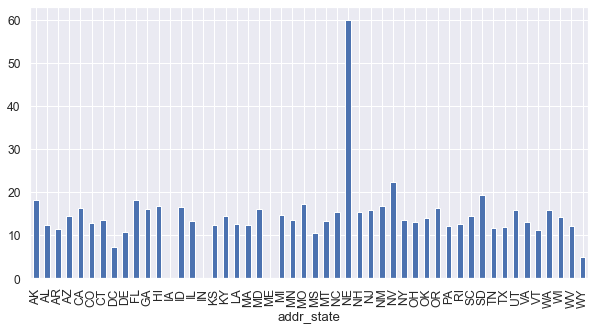

In [163]:
loan_result = loan.groupby(['loan_status','addr_state']).size()
loan_result = loan_result.reset_index(name='count')
loan_result = loan_result.pivot(index = ['addr_state'], columns = 'loan_status', 
                                values = 'count')
loan_result["% of charged Off"]=100*(loan_result['Charged Off']/(loan_result['Charged Off'] + loan_result['Fully Paid']))
loan_result["% of charged Off"].plot(kind='bar', figsize=(10, 5), y='addr_state', legend=False)


###### NE,NV has more charged off

<AxesSubplot:>

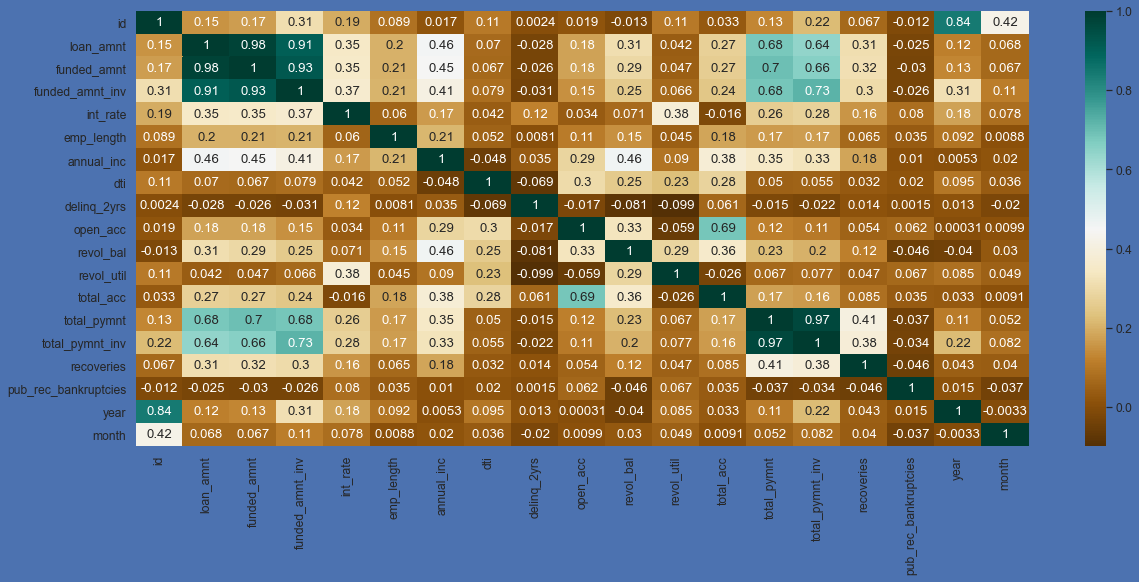

In [164]:
Defaulter=loan[loan['loan_status']=='Charged Off']
loan_correlation = Defaulter.corr()
#figsize=(10, 2)
fig, ax1 = plt.subplots(figsize=(20, 8),facecolor='b')
sns.set(font_scale=1.1)
sns.heatmap(loan_correlation,annot=True,cmap="BrBG")

In [48]:
#Dropping the columns as per our analysis till now

In [168]:
loan_df = loan.drop(labels=['funded_amnt', 'funded_amnt_inv', 'delinq_2yrs', 'revol_bal', 'total_pymnt', 
                            'total_pymnt_inv', 'year'], axis=1)

In [184]:
#converting categorical into numerical values for GRADE
loan_df['grade_val']=loan_df['grade'].apply(lambda x: "0" if x =='A' else ("1" if x=='B'
                                                             else ("2" if x =='C'
                                                                  else ("3" if x == 'D'
                                                                       else ("4" if x =='E'
                                                                            else ("5" if x =='F'
                                                                                  else "6")))))
                                           )                                            
print(loan_df.grade_val.value_counts())

1    11476
0     9926
2     7694
3     4985
4     2584
5      938
6      285
Name: grade_val, dtype: int64


<AxesSubplot:ylabel='% of charged Off'>

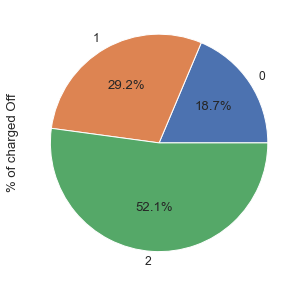

In [51]:
loan_result = loan.groupby(['loan_status','pub_rec_bankruptcies']).size()
loan_result = loan_result.reset_index(name='count')
loan_result = loan_result.pivot(index = ['pub_rec_bankruptcies'], columns = 'loan_status', 
                                values = 'count')
loan_result["% of charged Off"]=100*(loan_result['Charged Off']/(loan_result['Charged Off'] + loan_result['Fully Paid']))
loan_result["% of charged Off"].plot(kind='pie', figsize=(5, 5), y='pub_rec_bankruptcies',autopct='%1.1f%%', legend=False)
#fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
#sns.set(font_scale=1.1)
#sns.heatmap(loan_result, annot=True,cmap="BrBG", fmt='d')

###### Observations
1. Defaulters are more for higher number of pub_rec_bankruptcies
2. Although 0 pub_rec_bankruptcies have also Defaulters

<AxesSubplot:ylabel='% of charged Off'>

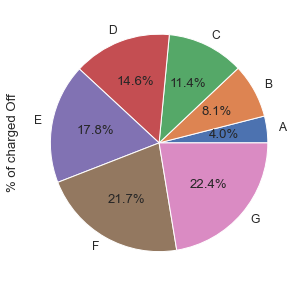

In [264]:
loan_result = loan.groupby(['loan_status','grade']).size()
loan_result = loan_result.reset_index(name='count')
loan_result = loan_result.pivot(index = ['grade'], columns = 'loan_status', 
                                values = 'count')
loan_result["% of charged Off"]=100*(loan_result['Charged Off']/(loan_result['Charged Off'] + loan_result['Fully Paid']))
loan_result["% of charged Off"].plot(kind='pie', figsize=(5, 5), y='grade',autopct='%1.1f%%', legend=False)


###### Observations
1. As the Grading system increases from A to G, so is the Charge off rate
2. G grades are more likely to be defaulters. A are less likely to default

<AxesSubplot:ylabel='% of charged Off'>

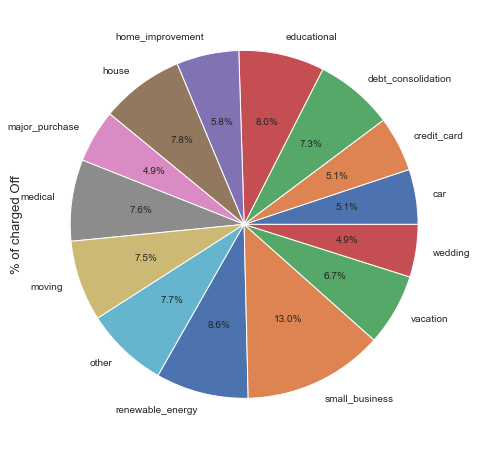

In [69]:
loan_result = loan.groupby(['loan_status','purpose']).size()
loan_result = loan_result.reset_index(name='count')
loan_result = loan_result.pivot(index = ['purpose'], columns = 'loan_status', 
                                values = 'count')

textprops = {"fontsize":10}


loan_result["% of charged Off"]=100*(loan_result['Charged Off']/(loan_result['Charged Off'] + loan_result['Fully Paid']))
loan_result["% of charged Off"].plot(kind='pie', figsize=(8, 8), y='pub_rec_bankruptcies',autopct='%.1f%%', 
                                     legend=False, 
                                     textprops=textprops)

<AxesSubplot:>

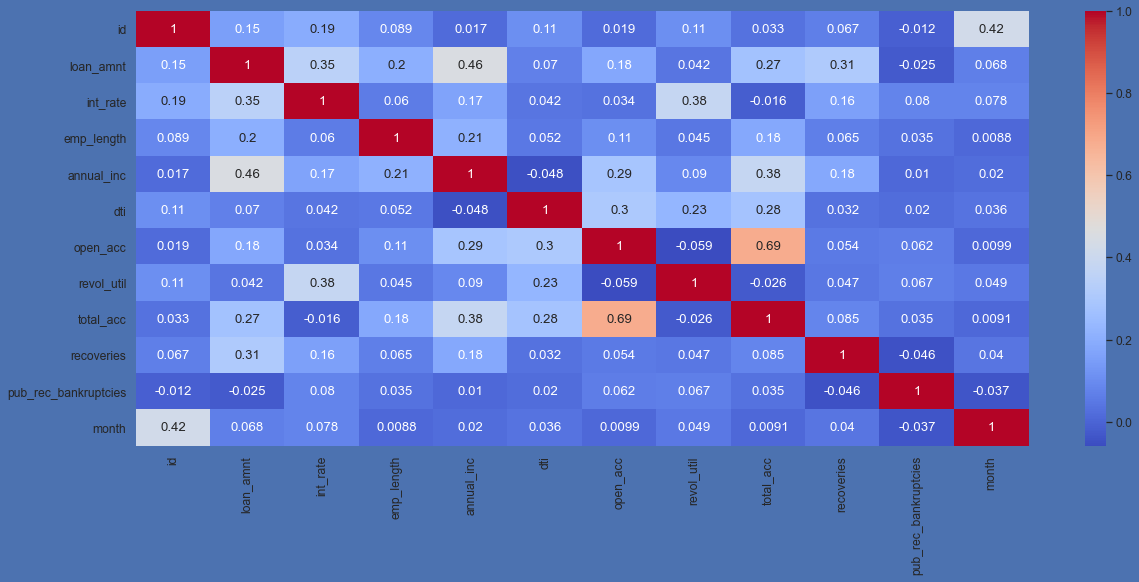

In [260]:
fig, ax1 = plt.subplots(figsize=(20, 8),facecolor='b')
sns.set(font_scale=1.1)
loan_df1=loan_df[loan_df.loan_status=='Charged Off']
sns.heatmap(loan_df1.corr(),annot=True,cmap= 'coolwarm')


###### Observations
1. Open_acc has positive Correlation with total_acc(which is correct )
2. pub_rec_bankruptcies has negative correlation with loan_amnt
3. loan_amnt has positive correlation with annual_inc
4. DTI has negative correlation with annual_inc

From the above heatmap, we can say Defaulters have with low annual income and more pub_rec_backruptcies. These defaulters have high DTI(As it is negatively correlated)

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

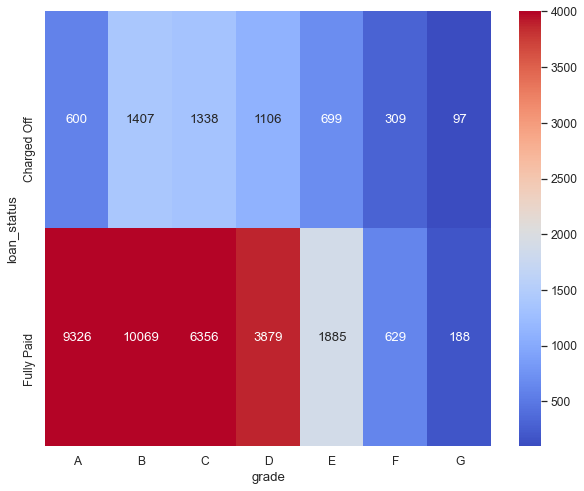

In [263]:
#HEATMAP for CATERGORICAL VALUES
loan_cats = loan_df.groupby(['grade','loan_status']).size()
loan_cats
loan_cats = loan_cats.reset_index(name = 'count')
loan_cats = loan_cats.pivot(index = ['loan_status'], columns = 'grade', values = 'count')

plt.figure(figsize=(10, 8))
sns.heatmap(loan_cats,annot=True,robust=False,vmax=4000,cmap= 'coolwarm', mask=False, fmt='.0f')                           